In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import Polygon
import numpy as np
import seaborn as sns
import time
from IPython.display import Image
from numpy import unravel_index

This notebook was used to generate the results plots given the episodes that were previously ran

Obtaining the data generated during SARSA to obtain Q values

In [3]:
s1 = pd.read_csv("sarsa_actions_fa.txt")
s2 = pd.read_csv("sarsa_actions_fa2.txt")

In [9]:
s2

,13 13
0,13 13
1,13 13
2,13 13
3,13 13
4,13 13
...,...
271680,20 19
271681,18 18
271682,19 18
271683,19 18


In [6]:
rewards = pd.read_csv("rewards.csv")
rewards = rewards.to_numpy()
rewards[0][1]

0.0

In [7]:
import math

def max_distance(coords):
    max_x, max_y = float('-inf'), float('-inf')
    min_x, min_y = float('inf'), float('inf')
    
    for x, y in coords:
        max_x = max(max_x, x)
        min_x = min(min_x, x)
        max_y = max(max_y, y)
        min_y = min(min_y, y)
        
    dist1 = math.sqrt((max_x-min_x)**2 + (max_y-min_y)**2)
    dist2 = math.sqrt((max_x-min_x)**2 + (max_y-min_y)**2)
    
    return max(dist1, dist2)

In [10]:
def obtain_values(col):
    num = round(len(col)/10)-1
    number_steps = {}
    distance = {}
    total_rewards = {}

    episode = 0
    steps = 0
    coords = []

    for i in range(0, (len(col))-1):
        coords.append([int(i) for i in col[i].split(" ")])
        if col[i] != col[i+1]:
            steps += 1

        if i%num == 0:
            number_steps[episode]=steps
            episode+=1
            steps = 0
            distance[episode]=(max_distance(coords))
            total_rewards[episode]=sum([rewards[i[0],i[1]] for i in coords])
    return number_steps,distance,total_rewards

number_steps,distance,total_rewards = obtain_values(s1["7 10"])
number_steps2,distance2,total_rewards2 = obtain_values(s2["13 13"])

In [11]:
total_rewards

{1: 0.0,
 2: 62011.85290000119,
 3: 122831.70250000527,
 4: 187950.0382999985,
 5: 251094.50749999136,
 6: 311051.0708999801,
 7: 375887.1115999649,
 8: 427181.9038999537,
 9: 483021.18599994096,
 10: 549886.3946999228,
 11: 611984.6425999012}

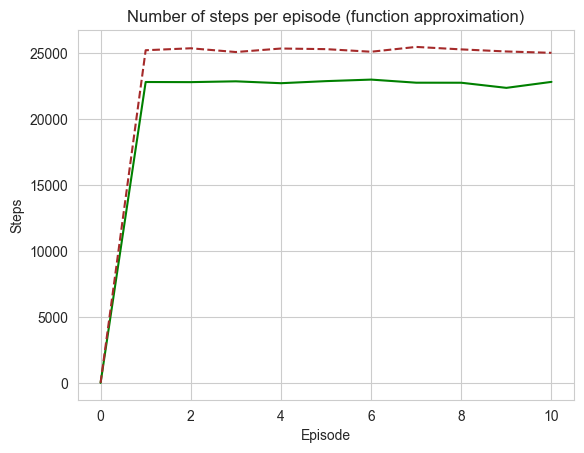

In [67]:
import seaborn as sns
sns.set_style("whitegrid")
sns.lineplot(number_steps,color="green")
sns.lineplot(number_steps2,color="brown",linestyle='dashed')

plt.title("Number of steps per episode (function approximation)")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.show()

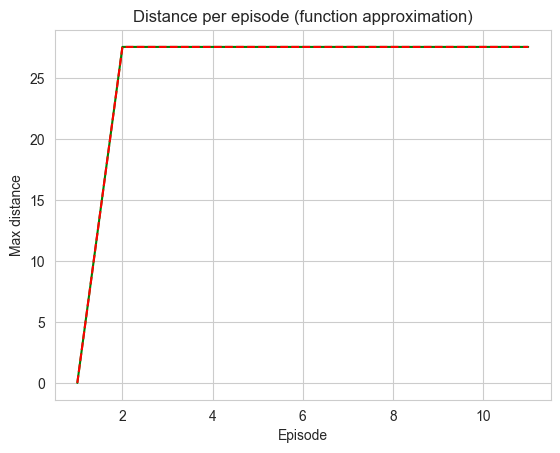

In [69]:
sns.set_style("whitegrid")
sns.lineplot(distance,color="green")
sns.lineplot(distance2,linestyle='dashed',color="red")
plt.title("Distance per episode (function approximation)")
plt.xlabel("Episode")
plt.ylabel("Max distance")
plt.savefig('vera_ff_r.png', dpi=120)
plt.show()

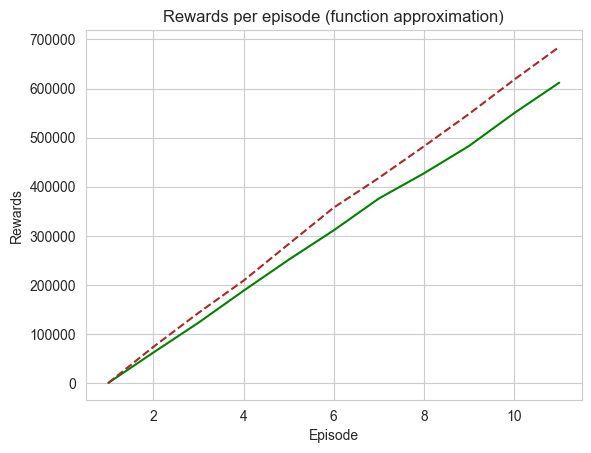

In [70]:
sns.set_style("whitegrid")
sns.lineplot(total_rewards,color="green")
sns.lineplot(total_rewards2,color="brown",linestyle='dashed')
plt.title("Rewards per episode (function approximation)")
plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.savefig('vera_ff_r.png', dpi=120)
plt.show()


First visit MC

In [2]:
mc_fv = pd.read_csv('mc_fv.txt')

In [53]:
a = []
for i in mc_fv:
        a.append(i[0].split(" "))

In [60]:
aa = np.asarray(a, dtype=float)
aa[0].shape

(26,)